In [13]:
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
#loading data from url
mcd_data = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [3]:
mcd_data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
mcd_data.shape

(1453, 15)

In [5]:
mcd_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
#selecting categorical columns
cat_columns = mcd_data.select_dtypes(['object']).columns
cat_columns = cat_columns[0:11]
cat_columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [7]:
#categorical -> numbers
for col in cat_columns:
    update = mcd_data[col] == 'Yes'
    mcd_data.loc[update,col] = 1
    update = mcd_data[col] == 'No'
    mcd_data.loc[update,col] = 0

In [8]:
mcd_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [9]:
#displaying column wise means
for col in cat_columns:
    print(col," : ",round(mcd_data[col].mean(),2))

yummy  :  0.55
convenient  :  0.91
spicy  :  0.09
fattening  :  0.87
greasy  :  0.53
fast  :  0.9
cheap  :  0.6
tasty  :  0.64
expensive  :  0.36
healthy  :  0.2
disgusting  :  0.24


In [10]:
#selecting only review attributes
sel_data=mcd_data.drop(columns=['Like','Age','VisitFrequency','Gender'])

In [11]:
sel_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


Text(0, 0.5, 'Second Principal Component')

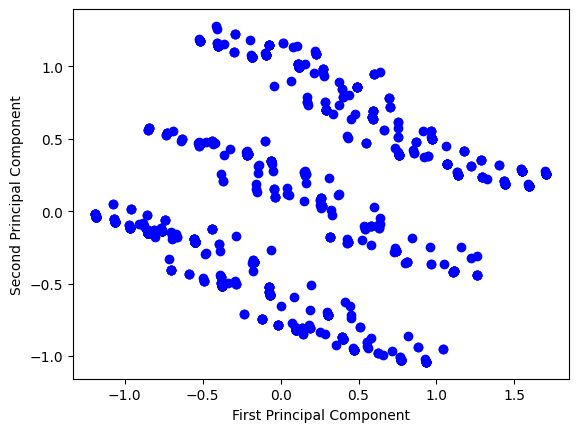

In [12]:
#PCA on sel_data
pca = PCA(n_components = 3)
pca.fit_transform(sel_data)
x_pca = pca.transform(sel_data)

#plotting PC1 vs PC2

for i in range(len(x_pca[:,0])):

    x=x_pca[i,0]
    y=x_pca[i,1]
    plt.plot(x,y,'bo')
    #plt.text(x * (1 + 0.01), y * (1 + 0.01),cat_columns[i],fontsize=12)
    
plt.xlabel('First Principal Component')
    
plt.ylabel('Second Principal Component')

In [34]:
x_pca.shape

(1453, 3)

Text(0, 0.5, 'Inertia')

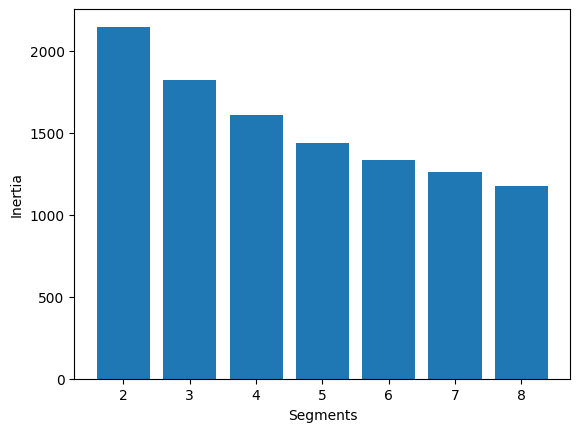

In [21]:
#running kmeans on various k values
inertia=[]
segment=[]
kvalues=range(2,9)

for k in kvalues:
    kmeans = KMeans(
        init='random',
        n_clusters=k,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(sel_data)
    temp = vars(kmeans)
    
    inertia.append(kmeans.inertia_)
    segment.append(k)

plt.bar(segment,inertia)
plt.xlabel('Segments')
plt.ylabel('Inertia')